# 3-3 さまざまなデータ構造を操ろう

## セグメント木

**SegmentTree**とは区間に対する操作を効率的に行うデータ構造である．

- 区間和
- 区間最小値
- 区間更新 etc.

![SegTree](assets/3-3/1-1_segtree.png)

ここでは区間最小値(RMQ: **R**ange **M**inimum **Q**uery)を例にセグメント木を考える．

$a_{0},a_{1},...,a{n-1}$に対して，次の操作を効率的に行うことを目指す．

- $\underset{s\le i\le t}{\min}a_{i}$を求める
- $a_{i}=x$と更新する

各ノードは対応する区間の最小値を持つ．

![SegTree_RMQ](assets/3-3/1-2_segtree_rmq.png)

### セグメント木によるRMQのクエリ

$a_{0},a_{1},...,a_{6}$の最小値を得るには，次の3つのノードを参照する．

![SegTree_RMQ_ex](assets/3-3/1-3_segtree_rmq_ex.png)

ある区間の最小値は次のように再帰的に求める

- 与えられた区間とそのノードの区間が全く交差していなければ，最小値に影響しない値を返す
- 与えられた区間が完全にそのノードの区間を含むようなノードであれば，そのノードの持つ値を返す
- そうでなければ，2つの子ノードについて再帰的に計算し，その2つの値の最小値を返す


![SegTree_RMQ_ex1](assets/3-3/1-3-1_segtree_rmq_ex1.png)  
再帰は根ノードからスタートする．与えられた区間が一部ノードの区間を含んでいるため，2つの子ノードについて考える．

![SegTree_RMQ_ex2](assets/3-3/1-3-2_segtree_rmq_ex2.png)  
左ノードについて，与えられた区間がノードの区間を完全に含んでいるので値3を返す．  
右ノードについて，与えられた区間が一部ノードの区間を含んでいるため，2つの子ノードについて考える．

![SegTree_RMQ_ex3](assets/3-3/1-3-3_segtree_rmq_ex3.png)  
左ノードについて，与えられた区間がノードの区間を完全に含んでいるので値4を返す．  
右ノードについて，与えられた区間が一部ノードの区間を含んでいるため，2つの子ノードについて考える．

![SegTree_RMQ_ex4](assets/3-3/1-3-4_segtree_rmq_ex4.png)  
左ノードについて，与えられた区間がノードの区間を完全に含んでいるので値1を返す．  
右ノードについて，与えられた区間とノードの区間が全く交差していないので，最小値に影響しない値を返す．

![SegTree_RMQ_ex5](assets/3-3/1-3-5_segtree_rmq_ex5.png)  
$\min(\min(\min(1, \inf), 4), 3)$を再帰的に計算し，最小値1を得る．

### セグメント木によるRMQの値の更新

$a_{0}$の値を更新する際は，次の4つのノードを再計算する．

![SegTree_update](assets/3-3/1-4_segtree_update.png)


場所$i$の値を更新する際には，$i$を含む区間に対応する全てのノードについて値を計算しなおす必要がある．更新したいノードから親を辿ってき，各親の子の最小値へと更新すればよい．（各親ノードを更新する値と比較するのは間違いであることに注意する）

### セグメント木によるRMQの計算量

いずれの処理も高々深さの数程度のノードしか訪れない．よって$O(\log{n})$

木の初期化及び空間計算量は$O(n)$なので注意．

### セグメント木によるRMQの実装

- 簡単のため要素数を2のべき乗に調整
- 木は配列で管理，長さは(要素数)×2-1
- 各ノードと配列上のインデックスの対応

![SegTree_implementation](assets/3-3/1-5_segtree_implementation.png)

In [2]:
# Segment Tree (RMQ)

from typing import Callable


class SegmentTree:
    '''Provides single point addition and obtaining the total product of a segment in O(logN)'''
    def __init__(self, n: int, op: Callable[[int, int], int], e: int) -> None:
        self.n = 1
        while self.n < n:
            self.n *= 2
        self.a: list[int] = [e] * (2 * self.n - 1)
        self.op: Callable[[int, int], int] = op
        self.e: int = e

    def update(self, i: int, x: int) -> None:
        '''a[i] = x'''
        i += self.n - 1
        self.a[i] = x
        while i > 0:
            i = (i - 1) // 2
            self.a[i] = self.op(self.a[i * 2 + 1], self.a[i * 2 + 2])

    def query(self, l: int, r: int, temp_i: int = 0, check_l: int = 0, check_r: int = None) -> int:
        '''op(a[l], a[l + 1], ..., a[r])'''
        if check_r is None:
            check_r = self.n

        if check_r <= l or r <= check_l:
            return self.e
        if l <= check_l and check_r <= r:
            return self.a[temp_i]
        else:
            return self.op(
                self.query(l, r, temp_i * 2 + 1, check_l, (check_l + check_r) // 2),
                self.query(l, r, temp_i * 2 + 2, (check_l + check_r) // 2 + check_r)
            )

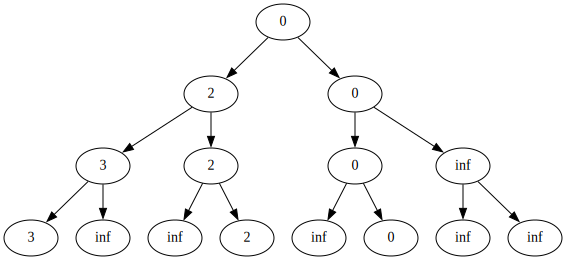

2

In [3]:

import graphviz


def visualize_segtree(seg):
    dot = graphviz.Digraph()
    for i in range(seg.n - 1):
        dot.edge(str(i), str(2 * i + 1))
        dot.edge(str(i), str(2 * i + 2))
    for i in range(2 * seg.n - 1):
        dot.node(str(i), label=str(seg.a[i]))
    display(dot)


seg = SegmentTree(n=8, e=float('inf'), op=min)  # [inf, inf, inf, inf, inf, inf, inf, inf]
seg.update(0, 3)  # [3, inf, inf, inf, inf, inf, inf, inf]
seg.update(3, 2)  # [3, inf, inf, 2, inf, inf, inf, inf]
seg.update(5, 0)  # [3, inf, inf, 2, inf, 0, inf, inf]
visualize_segtree(seg)
seg.query(0, 4)  # min([3, inf, inf, 2, inf])

### セグメント木を用いる問題

In [3]:
# Crane

...

Ellipsis

## Binary Indexed Tree（Fenwick木）

**BIT**とは列$a_{1},a_{2},...,a_{n}$があり，はじめは全ての$a_{i}=0$として，

- $add(i, x): a_{i} += x$
- $sum(i): a_{1}+a_{2}+...+a_{i}$

を実現するデータ構造である．

### Segment Treeによる実装

![SegTree](assets/3-3/2-1_segtree.png)

$sum(7)$ -> $24+10+1=37$  
![SegTree_sum](assets/3-3/2-2_segtree_sum.png)

$add(1, 2)$  
![SegTree_add](assets/3-3/2-3_segtree_add.png)

$a_{s},a_{s+1},...,a_{t}$を求める場合は$sum(t) - sum(s - 1)$を計算すればよく，区間和の計算にそういった制限を設けると，各クエリで右の子ノードは参照されなくなる．

![_](assets/3-3/2-4_unecessay_nodes.png)

この考え方を元にしたデータ構造がBITである．

### BITの仕組み

![BIT](assets/3-3/2-5_bit.png)

**POINT**  
- 2進表記されたノード番号の末尾の0の個数 = 区間の長さ - 1

### sum(i)

$i$ から $0$ に辿り着くまで，$i$より最後の$1$のビットを減算しながら，$i$の場所の値を加算していく．

![BIT_sum](assets/3-3/2-6_bit_sum.png)

### add(i, x)

$i$から始めて，$i$に最後の1のビットを加算しながら，$i$の場所の値に$x$を加えていく．

![BIT_add](assets/3-3/2-7_bit_add.png)

In [4]:
# BIT

class BIT:
    '''Provides single point addition and interval summation in O(logN)'''
    def __init__(self, n: int) -> None:
        self._n: int = n
        self._a: list[int] = [0] * (n + 1)

    def sum(self, i: int) -> None:
        '''a[1] + a[2] + ... + a[i]'''
        s: int = 0
        while i > 0:
            s += self._a[i]
            i = i & (i - 1)
        return s

    def add(self, i: int, x: int) -> None:
        '''a[i] += x'''
        while i <= self._n:
            self._a[i] += x
            i += i & -i

In [5]:
bit = BIT(8)  # [0, 0, 0, 0, 0, 0, 0, 0]
bit.add(1, 3) # [3, 0, 0, 0, 0, 0, 0, 0]
bit.add(3, 4) # [3, 0, 4, 0, 0, 0, 0, 0]
bit.add(5, 5) # [3, 0, 4, 0, 5, 0, 0, 0]
bit.sum(4)

7

In [ ]:
# バブルソートの交換回数

...

Ellipsis

In [7]:
# A Simple Problem with Integers

...

Ellipsis

## バケット法と平方分割

バケット法(bucket method)とは，列や平面をバケットなる単位に分割して，バケットごとにデータを管理することにより効率的な計算や操作を行う手法である．

特に，平方分割(sqrt decomposition)と呼ばれる，$n$個の要素からなる列を$\sqrt{n}$程度ごとのバケットにまとめて管理する手法を用いると，区間に対する処理が$O(\sqrt{n})$程度で行えるようになる．

### 平方分割によるRMQ

数列$a_{1},a_{2},...,a_{n}$があるとき，次の2つの処理を$O(\sqrt{n})$で実現することを目指す．

- $\underset{s\le i\le t}{\min}a_{i}$を求める
- $a_{i}=x$を行う（1点更新）

### 平方分割によるRMQの前処理

$b=\lfloor\sqrt{n}\rfloor$とし，$a$を$b$ごとのバケットに分け，各バケットでの最小値を計算する．

### 平方分割によるRMQのクエリ

- 区間に完全に含まれるバケットについては，そのバケットの最小値
- 自身のバケットが区間に含まれない要素については，個々の最小値

これらの最小値が区間の最小値となる．

|----<======|==========|==========|==>--------|
        3         2         1      0
     i                               j
|-----------|----------|----------|-----------|


    1 5 8 10 11 12 18 340

```python
a = [1, 2, 4, 5, 7, 8]
lo = 0, hi = 5

while lo - hi:  # metaにぶたん
    mid = (lo + hi) // 2
    x = a[mid]
```


### 平方分割によるRMQの値の更新

バケットの要素をチェックする必要がある？？

6, 100, 101, 102 -> 6
6を2000に変える時．

### 平方分割によるRMQの計算量

### 平方分割を用いる問題

- 区間に存在する$x$以下の数の個数を効率的に数えたい -> 区間の大きさを$j-i$，$x$以下の個数を$y$とすると，$j-i-y=k$となる$x$を二分探索すればよい
  - 区間に完全に含まれるバケットについては，(さらに)二分探索によって個数を計算する（各区間は事前にソートされている）
  - 自身のバケットが区間に完全に含まれない要素については，個々を調べる

  この計算量は，各バケットの大きさ（要素数） $b=\sqrt{n}$ 程度とすると，$O(\frac{n}{b}\log{b}+b)=O(\sqrt{n}\log{n})$となる．(バケット数×各バケットに対する計算量+1×個々の要素数)

  - バケットに対する操作が，個々の要素に対する操作よりも重いので，もう少しバケットを大きくする（バケット個数を小さくする）方が効率的となる

  $b=\sqrt{n\log{n}}$ 程度とすると，$O(\frac{n}{b}\log{b}+b)=O(\sqrt{n\log{n}})$

- 探索する$x$の値は数列に含まれる値であるため，探索は$O(\log{n})$で行える．よって1クエリに対する計算量は$O(\log{n}\times\sqrt{n\log{n}})=O(\sqrt{n}\log^{\frac{3}{2}}n)$

- 前処理を含めると，全体としての計算量は$O(n\log{n}+m\sqrt{n}\log^{\frac{3}{2}}n)$

In [8]:
# K-th Number

N: int; M: int
A: list[int]
I: list[int]; J: list[int]; K: list[int]

B: int = 1000

...

Ellipsis

各ノードに**列**を持たせるセグメント木による解法も存在する．

- 構築においては，マージソートの過程がそのまま木となる
- ある区間の$x$以下の数の個数を求めるには
  - 与えられた区間とそのノードの区間が全く交差していなければ0個
  - 与えられた区間が完全にそのノードの区間を含むようなノードであれば，素のノードの持つ列で二分探索を行う
  - そうでなければ，2つの子ノードについて再帰的に計算する

全体としての計算量は$O(n\log{n}+m\log^{3}{n})$となる

In [9]:
# K-th Number (Segment Tree)

...

Ellipsis